In [1]:
import sys
sys.path.append("..")
import numpy as np

In [36]:
pip install econometron

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip show econometron

Name: econometron
Version: 0.0.1
Summary: A Python package for solving ,simulating and estimating DSGE and VAR models.
Home-page: UNKNOWN
Author: Mohamed Amine Ouerfelli 
Author-email: mohamedamine.ouerfelli@outlook.com
License: MIT
Location: c:\users\asus\econometron
Editable project location: c:\users\asus\econometron
Requires: colorama, matplotlib, numpy, pandas, scipy, statsmodels, sympy
Required-by: 


In [37]:
#in your case from econometron.Models import m

from Models import RE_model

## 🧠 New Keynesian Model — A Walkthrough

In this example, we work with a **linear New Keynesian model** to illustrate the core dynamics of output, inflation, and monetary policy.

---

### 📌 Model Structure

The model includes four main equations:

1. **Euler Equation** — models household intertemporal choices:

   $$
   x_t = x_{t+1} + \frac{1}{g}(r_t - \pi_{t+1}) = 0
   $$

   where $x_t$ is the output gap, $r_t$ is the nominal interest rate, and $\pi_{t+1}$ is expected inflation.

2. **New Keynesian Phillips Curve** — models inflation dynamics under sticky prices:

   $$
   \pi_t = \beta \pi_{t+1} - \kappa (x_t - \bar{x}_t) 
   $$

   where $\bar{x}_t$ is **potential output** and $x_t - \bar{x}_t$ represents the output gap relative to potential.

3. **Monetary Policy Rule (Taylor Rule)** — describes how the central bank adjusts the interest rate in response to inflation:

   $$
   r_t = \phi \pi_t 
   $$

4. **Potential Output Dynamics** — captures the stochastic evolution of potential output:

   $$
   \bar{x}_{t+1} = \rho \bar{x}_t + \sigma_x
   $$

---

### 📊 Variables

* $x_t$: Output
* $\pi_t$: Inflation
* $r_t$: Nominal interest rate
* $\bar{x}_t$: **Potential output**

---

### ⚙️ Parameters

* $g = 5$: Inverse of relative risk aversion
* $\beta = 0.99$: Discount factor
* $\kappa = 0.88$: Slope of Phillips curve
* $\rho = 0.95$: Persistence of potential output
* $\phi = 1.5$: Taylor rule coefficient
* $\sigma_x = 0.01$: Shock to potential output


In [6]:
# Model setup
equations = [
    "x_t - x_tp1 + (1/g) * (r_t - p_tp1) = 0",
    "p_t - beta * p_tp1 - kappa * (x_t - xbar_t) = 0",
    "- r_t + phi*p_t=0",
    "- xbar_tp1 + rho * xbar_t + sigmax = 0"
]

variables = ['x', 'p', 'r','xbar']
states = ['xbar']
exo_states=['xbar']
shock_names = ['sigmax']
# Parameters dictionary
parameters = {
    'g': 5,      # Inverse of relative risk aversion (1/g)
    'beta': 0.99,       # Discount factor
    'kappa': 0,
    'rho': 0.95,        # Persistence of output gap target
    'phi': 1.5,         # Taylor rule inflation coefficient
    'd': 0.5,          # Calvo parameter
    'sigmax':0.01
}

In [7]:
# Analytical steady state for initial guess
sigma_X, beta,g, rho, phi, d = parameters['sigmax'],parameters['beta'],parameters['g'],parameters['rho'],parameters['phi'],parameters['d']
parameters['kappa'] = ((1 - d) * (1 - d * beta)) / d
initial_guess = [1, 1, 1]

In [13]:
# Initialize and run model
NK = RE_model(
    equations=equations,
    variables=variables,
    exo_states=exo_states,
    shocks=shock_names,
    parameters=parameters,

)

In [14]:
NK.set_initial_guess(initial_guess)

In [15]:
NK.compute_ss(guess=initial_guess, method='fsolve', options={'xtol': 1e-10})

Steady-state residuals: [-0.   -0.   -0.   -0.01]


x        0.000000e+00
p       1.482197e-323
r       1.976263e-323
xbar     0.000000e+00
dtype: float64

In [17]:
NK.approximate()

linear
0
Equation 1, shock sigmax, derivative: 0
0
Equation 2, shock sigmax, derivative: 0
0
Equation 3, shock sigmax, derivative: 0
1
Equation 4, shock sigmax, derivative: 1


(array([[0.  , 0.  , 0.99, 0.  ],
        [0.  , 0.  , 0.  , 0.  ],
        [1.  , 0.  , 0.  , 0.  ],
        [0.  , 1.  , 0.2 , 0.  ]]),
 array([[ 0.505, -0.505,  1.   ,  0.   ],
        [ 0.   ,  0.   ,  1.5  , -1.   ],
        [ 0.95 ,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  1.   ,  0.   ,  0.2  ]]),
 array([[0.],
        [0.],
        [1.],
        [0.]]))

## Solving THe Model
**The Solution Method Here Is Klein(2000) solab.m**


In [19]:
NK.exo_states

['xbar']

In [20]:
NK.variables

['x', 'p', 'r', 'xbar']

In [21]:
NK.solve_RE_model()
print("Policy Function (f):\n", NK.f)
print("State Transition (p):\n", NK.p)


Model dimensions: n=4, nk=1, ns=1
Matrix shapes: A=(4, 4), B=(4, 4), C=(4, 1)
Variable order: ['x'] (states) + ['p', 'r', 'xbar'] (controls)
QZ eigenvalues (should have 1 stable): [0.95              inf 1.07848566 1.07848566]
Stable eigenvalues: 1/1 (should be 1)

Final matrices:
F (controls = F * states): (3, 1)
P (state transition): (1, 1)
Policy Function (f):
 [[ 0.94916702]
 [-0.43143956]
 [-0.64715933]]
State Transition (p):
 [[0.95]]


c:\users\asus\econometron\Models\Linear_RE.py:729: RuntimeWarning: divide by zero encountered in divide
  eigenvals = np.abs(beta / alpha)
c:\users\asus\econometron\Models\Linear_RE.py:729: RuntimeWarning: invalid value encountered in divide
  eigenvals = np.abs(beta / alpha)


c:\users\asus\econometron\Models\Linear_RE.py:883: UserWarning: Steady state contains zeros so normalize set to False.
  self._compute_irfs(T=T, t0=1, shocks=None, center=True)


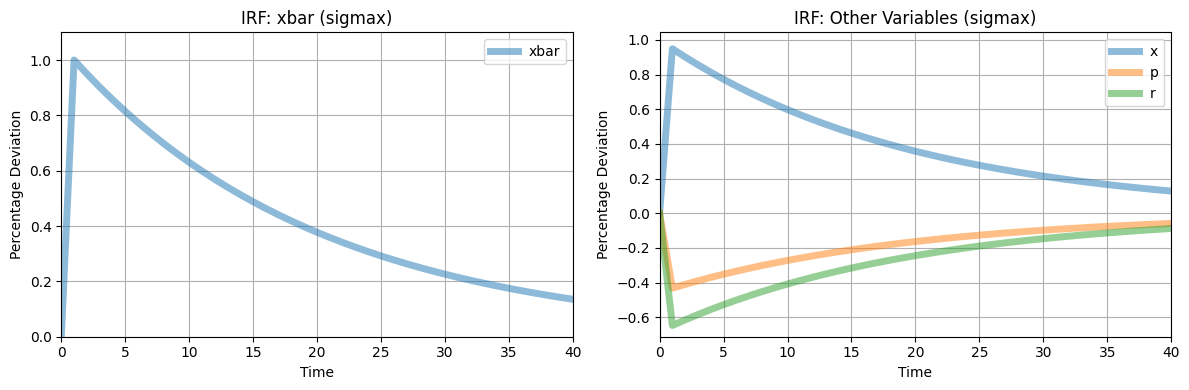

In [22]:
NK.plot_irfs()

In [23]:
NK.simulate(T=51, drop_first=10, covariance_matrix=np.array([[0.01**2]]))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20300\3049471006.py:1: UserWarning: Steady state contains zeros so normalize set to False.
  NK.simulate(T=51, drop_first=10, covariance_matrix=np.array([[0.01**2]]))


,sigmax_t,x_t,p_t,r_t,xbar_t
0,-0.017390,-0.059344,-0.056327,0.025603,0.038405
1,0.007802,-0.048575,-0.046105,0.020957,0.031436
2,0.026899,-0.019247,-0.018269,0.008304,0.012456
3,-0.002910,-0.021195,-0.020118,0.009144,0.013717
4,0.020464,0.000329,0.000312,-0.000142,-0.000213
5,0.014085,0.014398,0.013666,-0.006212,-0.009318
6,0.000703,0.014381,0.013650,-0.006204,-0.009307
7,-0.001006,0.012655,0.012012,-0.005460,-0.008190
8,0.002007,0.014030,0.013316,-0.006053,-0.009079
9,0.004070,0.017398,0.016514,-0.007506,-0.011260


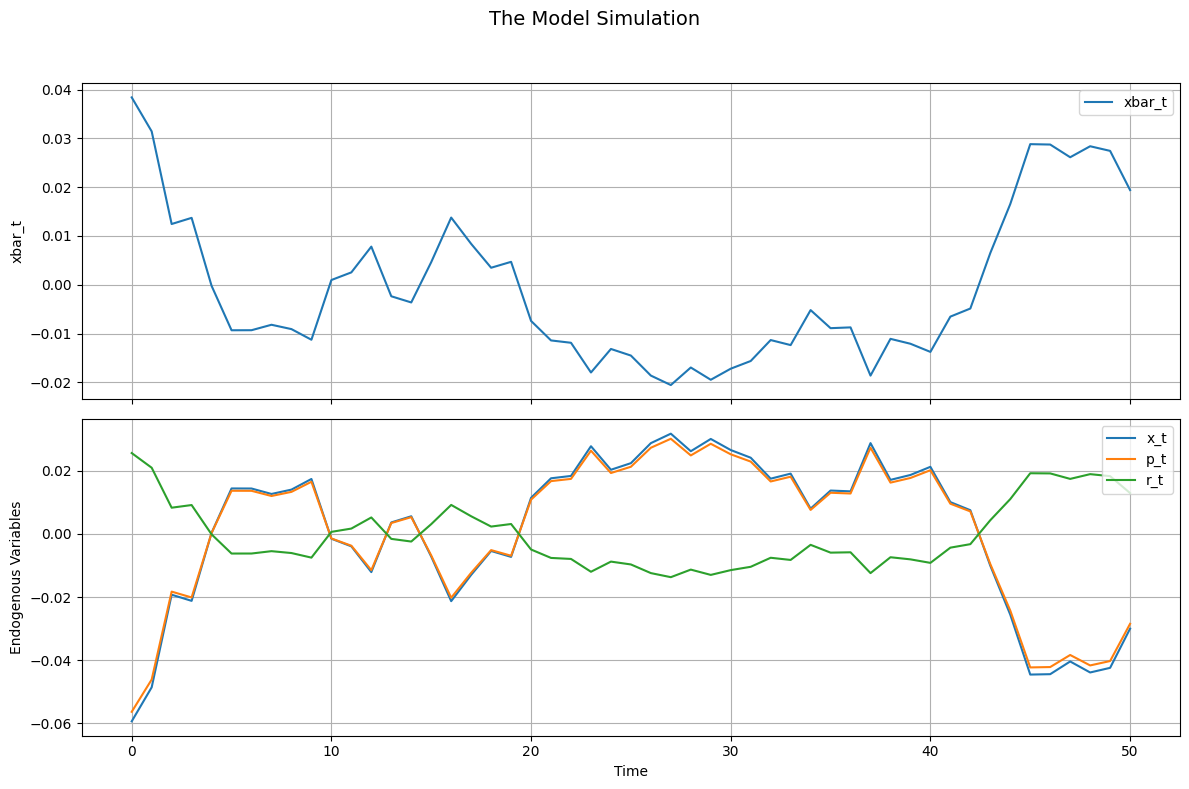

In [24]:
NK.simulations()

# Estimation of the Model


## 📈 Model Estimation Strategy

After solving the structural model, we aim to express it in a **state-space form** to enable estimation. This often requires **augmenting the model with additional stochastic shocks** to match the variability and dynamics observed in real-world data.

---

### 🧩 Why Add More Shocks?

Economic models—especially DSGEs—often understate the volatility seen in macroeconomic time series. By introducing **additional exogenous shocks** (e.g., preference, risk premium, measurement error), we:

* Improve the model’s empirical fit
* Allow for richer dynamic responses
* Enable accurate filtering and smoothing in estimation

---

## ⚙️ Estimation Techniques

We employ two complementary estimation strategies:

### 1. **Classical Maximum Likelihood Estimation (MLE)**

In this method, we treat the model as a **state-space system**:

$$
\begin{aligned}
x_{t+1} &= A x_t + B \varepsilon_t \quad &\text{(transition equation)} \\
y_t &= C x_t + D \eta_t \quad &\text{(measurement equation)}
\end{aligned}
$$

Here, $x_t$ are latent (unobserved) states, $y_t$ are observables, and $\varepsilon_t, \eta_t$ are shock terms. The parameters in matrices $A, B, C, D$ are functions of the model's structural parameters.

**The Kalman Filter** is used to:

* Estimate the unobserved states given observed data
* Compute the **likelihood** of the model
* Maximize this likelihood with respect to the parameters

---

### 🧮 What Is the Kalman Filter? (For Economists)

Think of the Kalman filter as a **recursive forecasting tool**. At every period, it:

1. **Predicts** the value of the unobserved economic variables (like expectations or technology)
2. **Updates** those predictions using observed data (like GDP, inflation)
3. **Minimizes the mean squared error** of the predictions

It is especially powerful for DSGE models because:

* It deals naturally with unobservable variables
* It handles measurement noise
* It works under linear-Gaussian assumptions (which linearized DSGEs satisfy)

---

### 2. **Bayesian Estimation**

Bayesian estimation allows us to **combine prior economic knowledge** with observed data.

Steps:

* Define **priors** for each structural parameter (e.g., Beta for bounded parameters, Normal for preferences, Inverse Gamma for variances)
* Use the **Kalman filter** to compute the likelihood
* Apply **Bayes’ rule** to obtain the posterior distribution:

$$
\text{Posterior} \propto \text{Likelihood} \times \text{Prior}
$$

* Use **MCMC algorithms** (e.g., Metropolis-Hastings) to sample from the posterior

---

### ✳️ Summary

| Method   | Needs Prior? | Output          | Strengths                         |
| -------- | ------------ | --------------- | --------------------------------- |
| MLE      | ❌ No         | Point estimates | Fast, interpretable               |
| Bayesian | ✅ Yes        | Distributions   | Incorporates uncertainty & theory |



**1-State Space Formulation**

In [26]:
from utils import optimizers ,estimation ,state_space

In [27]:
from utils.state_space import update_ss

In [38]:
def derived_fn(p):
    p['kappa'] = ((1 - p['d']) * (1 - p['d'] * p['beta'])) / p['d']
#since we have kappa is written in function of Beta nd delta , the derived_fn here is param fixer , for parameter that are not intialized  
def R_builder(p):
  A1 = np.array([[1, -p['phi'], 0],
                    [0, 1, -p['kappa']],
                    [1/p['g'], 0, 1]])
  if abs(np.linalg.det(A1)) < 1e-6:
    raise ValueError("A1 matrix is singular")
  R1= np.array([[p['sigma_y'], 0, 0],
                [0, p['sigma_p'], 0],
                [0, 0, p['sigma_r']]])

  R=np.linalg.solve(A1,R1)

  return R

def C_builder(p):
    return np.array([[p['sigmax']]])

# Assuming you have this solver:
# def NK.solve(params): ...

# Define updater
base_params = {
    'g': 5,
    'beta': 0.99,
    'kappa': 0.8,
    'rho': 0.95,
    'phi': 1.5,
    'd': 0.5,
    'sigmax': 0.01,
    'sigma_y': 0.01,
    'sigma_p': 0.01,
    'sigma_r': 0.01
}

update_state_space = update_ss.make_state_space_updater(
    base_params=base_params,
    solver=NK.solve_RE_model,
    build_R=R_builder,
    build_C=C_builder,
    derived_fn=derived_fn
)

In [39]:
parameters = {
    'g': 5,      # Inverse of relative risk aversion (1/g)
    'beta': 0.99,       # Discount factor
    'kappa': 0.8,
    'rho': 0.95,        # Persistence of output gap target
    'phi': 1.5,         # Taylor rule inflation coefficient
    'd': 0.5,          # Calvo parameter
    'sigmax': 0.01,
    'sigma_y': 0.01,
    'sigma_p': 0.01,
    'sigma_r': 0.01
}

# Example usage:
updated = update_state_space(parameters)
print(updated)

ValueError: The system is already approximated.

**2-Estimation MLE**

In [40]:
import scipy.io as sio
mat = sio.loadmat('../Z.mat')
y=mat['Z']

`Y` , is the data i t contains Output , Inflation , Nominal Interest Rate

In [54]:
y

array([[ 2.65238043e-02,  1.66151784e-02,  1.82815526e-02,
         1.90479267e-02,  1.03643008e-02,  6.13067498e-03,
         4.59704912e-03,  5.03842325e-03,  6.75479739e-03,
         6.74617153e-03,  7.46254567e-03,  9.70391980e-03,
         1.18452939e-02,  6.61166808e-03,  4.70304222e-03,
         3.36941635e-03,  3.38579049e-03,  3.95216463e-03,
         3.34353877e-03,  1.13491290e-03, -5.73712958e-04,
        -3.57338820e-04, -4.15964682e-04,  7.25409455e-04,
         1.26678359e-03,  1.53315773e-03,  9.49531868e-04,
         2.26590601e-03,  4.38228014e-03,  5.67365428e-03,
         8.16502842e-03,  8.95640256e-03,  7.39777669e-03,
         6.28915083e-03,  5.45552497e-03,  5.49689911e-03,
         5.36327324e-03,  4.37964738e-03,  1.17102152e-03,
        -1.87604342e-04, -6.71230204e-04, -2.65485607e-03,
        -4.58848193e-03, -5.14710779e-03, -6.35573365e-03,
        -6.83935952e-03, -6.77298538e-03, -6.80661124e-03,
        -6.59023710e-03, -6.69886297e-03, -6.08248883e-0

In [49]:
y.shape
y[0,:]

array([ 2.65238043e-02,  1.66151784e-02,  1.82815526e-02,  1.90479267e-02,
        1.03643008e-02,  6.13067498e-03,  4.59704912e-03,  5.03842325e-03,
        6.75479739e-03,  6.74617153e-03,  7.46254567e-03,  9.70391980e-03,
        1.18452939e-02,  6.61166808e-03,  4.70304222e-03,  3.36941635e-03,
        3.38579049e-03,  3.95216463e-03,  3.34353877e-03,  1.13491290e-03,
       -5.73712958e-04, -3.57338820e-04, -4.15964682e-04,  7.25409455e-04,
        1.26678359e-03,  1.53315773e-03,  9.49531868e-04,  2.26590601e-03,
        4.38228014e-03,  5.67365428e-03,  8.16502842e-03,  8.95640256e-03,
        7.39777669e-03,  6.28915083e-03,  5.45552497e-03,  5.49689911e-03,
        5.36327324e-03,  4.37964738e-03,  1.17102152e-03, -1.87604342e-04,
       -6.71230204e-04, -2.65485607e-03, -4.58848193e-03, -5.14710779e-03,
       -6.35573365e-03, -6.83935952e-03, -6.77298538e-03, -6.80661124e-03,
       -6.59023710e-03, -6.69886297e-03, -6.08248883e-03, -4.19111469e-03,
       -2.74974055e-03, -

In [53]:
data=y[::-1,:]

In [55]:
NK.variables

['x', 'p', 'r', 'xbar']